# **Regresión Lineal**

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
from datetime import datetime, timedelta
import winsound

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression

## **Datos**

In [6]:
df = pd.read_csv('../../Datos/housing.csv')

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## **Análisis de los datos**

In [10]:
sns.set(style='whitegrid', context='notebook')

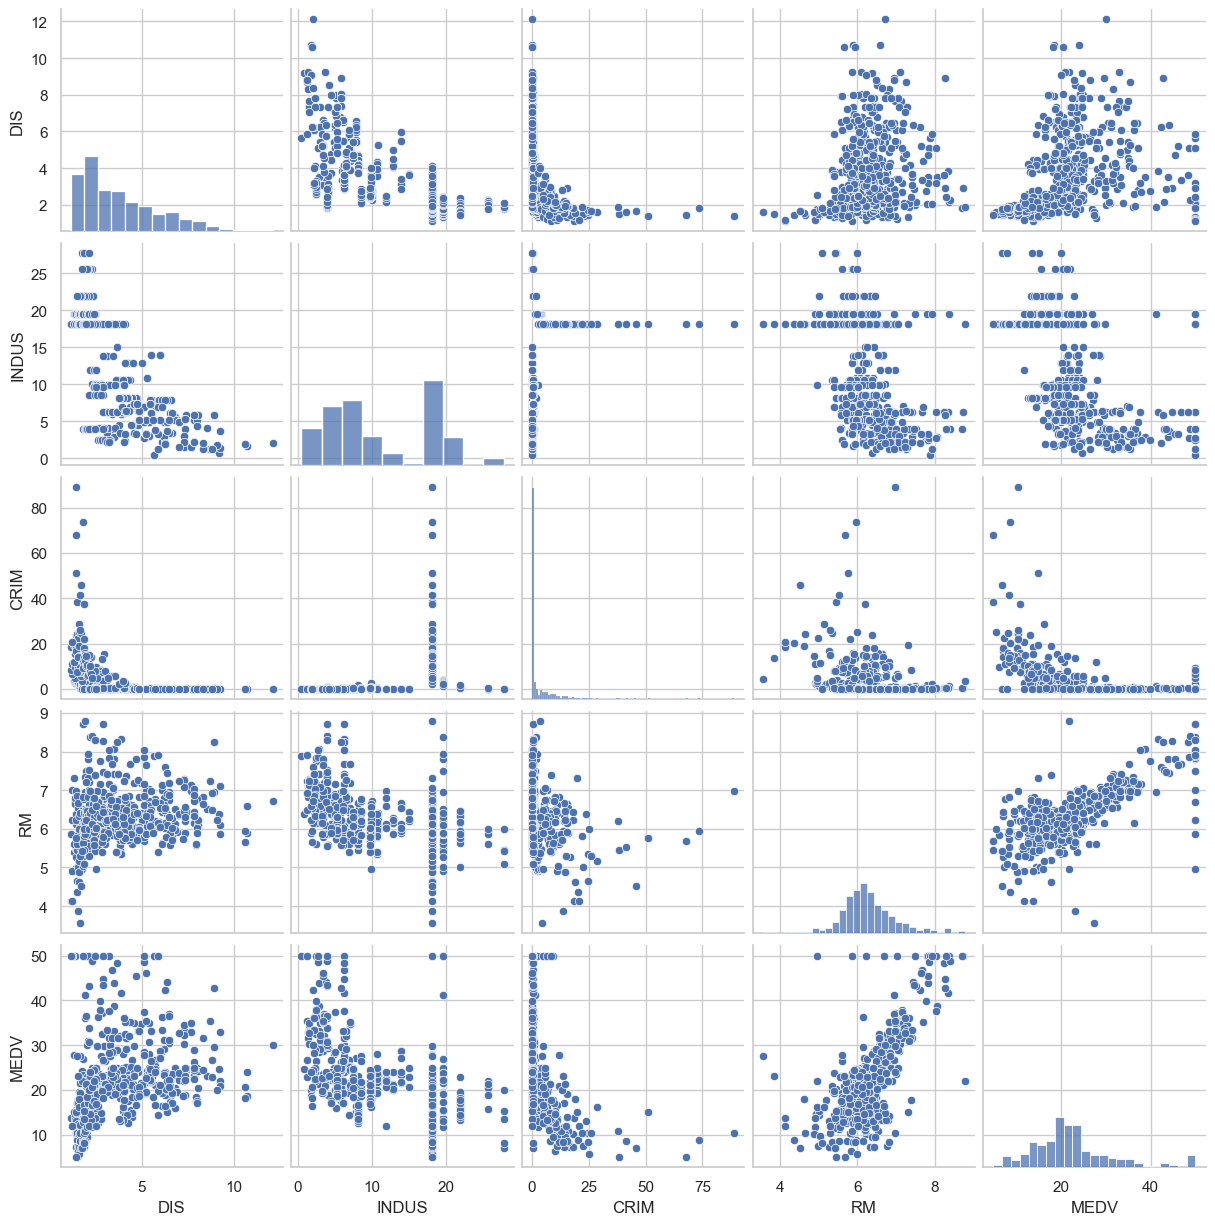

Wall time: 4.37 s


In [13]:
%%time
cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']

sns.pairplot(df[cols], height=2.5)
plt.show()

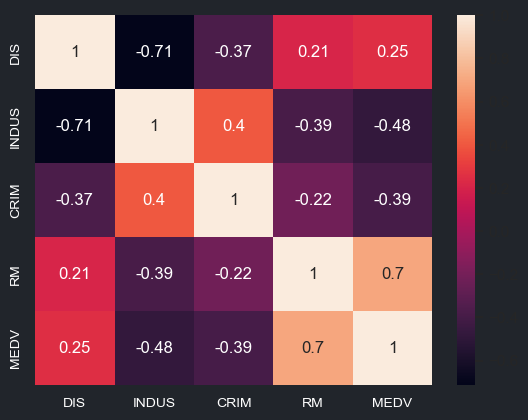

In [14]:
fig, ax = plt.subplots()
sns.heatmap(df[cols].corr(), annot=True)
fig.patch.set_facecolor('#21252b') 

plt.xticks(fontsize=10, color='white', weight=100)
plt.yticks(fontsize=10, color='white', weight=100)

plt.show()

## **Modelo de Regresión Lineal**

In [15]:
X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

**Estandarizamos nuestros valores**

In [16]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [17]:
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

**Modelo**

In [18]:
model = LinearRegression()
model.fit(X_std, y_std)

LinearRegression()

### **Análisis de resultados**

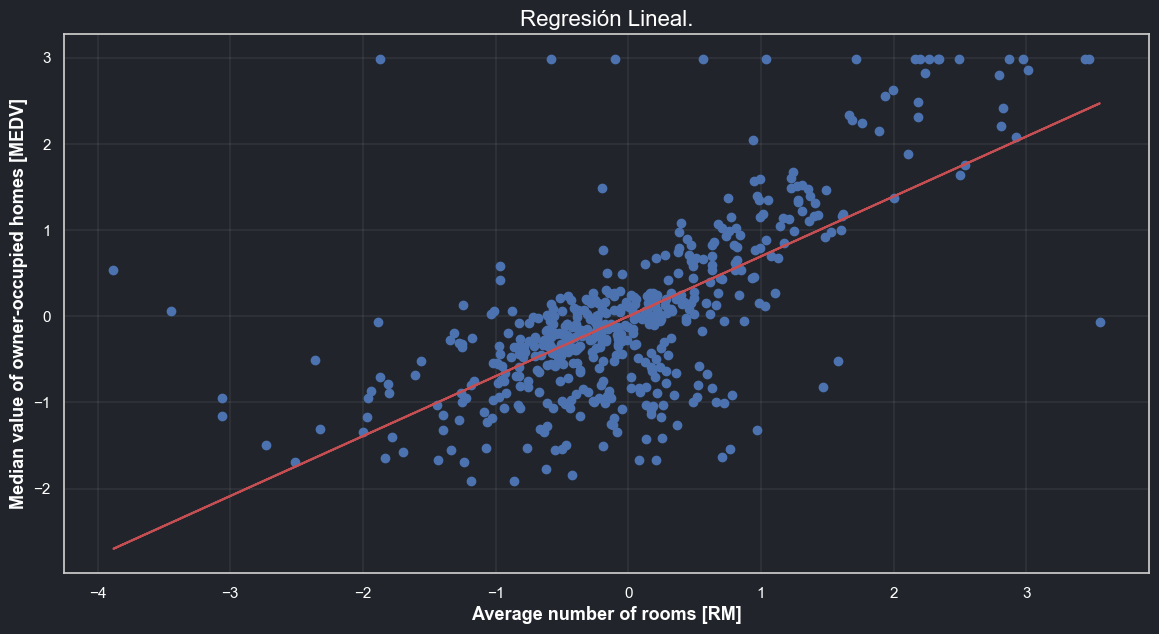

In [19]:
fig, ax = plt.subplots(figsize=(14, 7))
fig.patch.set_facecolor('#21252b') 
plt.title('Regresión Lineal.', size=16, color='white')

plt.scatter(X_std, y_std)
plt.plot(X_std, model.predict(X_std), color='r')

ax.set_facecolor('#21252b') 

plt.xlabel('Average number of rooms [RM]', size=13, weight=700, color='white')
plt.ylabel('Median value of owner-occupied homes [MEDV]', size=13, weight=700, color='white')

plt.xticks(fontsize=11, color='white', weight=100)
plt.yticks(fontsize=11, color='white', weight=100)

plt.grid(linewidth=0.1)

plt.show()

### **Generar predicciones con el modelo**

In [20]:
num_habitaciones = 13
num_hab_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1, 1))

predict_std = model.predict(num_hab_std)
predict = sc_y.inverse_transform(predict_std)[0][0]*1000

print(f'El precio de una casa con {num_habitaciones} habitaciones es de {round(predict, 2)} dolares')

El precio de una casa con 13 habitaciones es de 83656.8 dolares


### **Evaluación del Modelo**

**R2**

In [21]:
y_predict = [sc_y.inverse_transform(model.predict(sc_x.transform(np.array([i]).reshape(-1, 1))))[0][0] for i in X]
y_true  = [i[0] for i in y]

In [22]:
r2 = r2_score(y_true, y_predict)

In [23]:
print(f'La presición del modelo es del {round(r2, 2)*100}%')

La presición del modelo es del 48.0%


**MSE**

In [24]:
mse = round(mean_squared_error(y_true, y_predict), 2)

In [25]:
print(f'El error cuadratico medio del modelo es de {mse}')

El error cuadratico medio del modelo es de 43.6


## **Modelo de Regresión Lineal Multivariable**

In [32]:
X = df[['RM', 'INDUS']].fillna(0).values
y = df['MEDV'].values.reshape(-1, 1)

**Estandarizamos nuestros valores**

In [33]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [34]:
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

**Modelo**

In [35]:
model = LinearRegression()
model.fit(X_std, y_std)

LinearRegression()

### **Generar predicciones con el modelo**

**R2**

In [36]:
y_pred_std = model.predict(X_std)
y_pred = sc_y.inverse_transform(y_pred_std)

In [37]:
r2 = r2_score(y, y_pred)

In [38]:
print(f'La presición del modelo es del {round(r2, 2)*100}%')

La presición del modelo es del 53.0%


**MSE**

In [39]:
mse = round(mean_squared_error(y, y_pred), 2)

In [40]:
print(f'El error cuadratico medio del modelo es de {mse}')

El error cuadratico medio del modelo es de 39.57
